# Introduction to neural network classification with TensorFlow


In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one or another.

A few types of classification problems are:
* Binary classification (Is the email spam or not?)
* Multiclass classification (Is the photo of pizza, steak or sandwich?)
* Multilabel classification (The tags which are given to an article)

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03, 
                    random_state = 42)

In [ ]:
# Check out features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

The data is difficult to understand right now, it would be better to visualize it 

In [ ]:
import pandas as pd
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


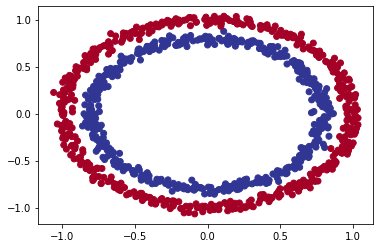

In [ ]:
# Visualize this plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c= y, cmap = plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with?
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first instance of data
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evalute..

In [ ]:
# Import tensorflow
import tensorflow as tf

# 0. Put in the seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5825 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.0480 - accuracy: 0.4570
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.5356 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.0600 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3891 - accuracy: 0.5210


In [ ]:
# Let's try and improve our model by training for longer 
model_1. fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712531566619873, 0.5]

We are working on a binary classification problem. For a situation like this, an accuracy of 0.45 is good for nothing. Hence, we need to improve.

One way of improving is by adding one extra layer.

In [ ]:
# Import tensorflow
import tensorflow as tf

# 0. Put in the seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose = 100)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [ ]:
# 4. Evaluate our model. We are evaluating on the same set on which we trained the model to check if our model is learning or not 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939091086387634, 0.5]

## Improving our model

Things we can do in different steps of modelling to improve our model's performance:

1. Create a model: Add more layers, Increase the number of hidden units within a layer.
2. Compiling a model: Choose a different optimization function. We can go for Adam.
3. Fitting a model: We can fit our model for more epochs.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
# 4. Evaluate the model 
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5100


[0.6967594623565674, 0.5099999904632568]

from numpy import meshgrid
To visualize our model, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


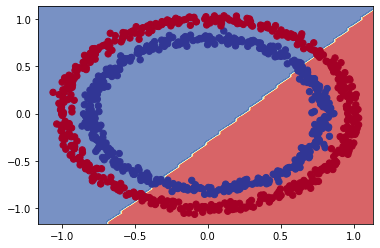

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                      X= X,
                      y=y)

In [ ]:
# # Let's see if our model can be used for regression problem

# tf.random.set_seed(42)

# # Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# # Split our data for training and testing 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # Fit the model
# model_3.fit(X_reg_train, y_reg_train, epochs = 100ptim)

We get this error because the `model_3` is for Binary Classification. But for the instance, we are working on regression problem. Let us change our model to suit the problem.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 336.7552 - mae: 336.7552
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 203.4536 - mae: 203.4536
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 78.4715 - mae: 78.4715
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 69.9274 - mae: 69.9274
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 81.3430 - mae: 81.3430
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 53.0211 - mae: 53.0211
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 47.5899 - mae: 47.5899
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7054 - mae: 43.7054
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 45.8878 - mae: 45.8878
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 43.3962 - mae: 43.3962
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


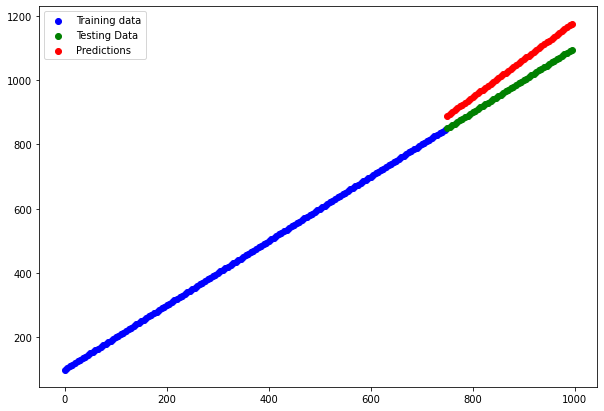

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend();

## The missing piece: Non-Linearity

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# We go to tensorflow playground and play with the model and try to create similar models in here
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= "linear")
])

# 2. Compile the model 
model_5.compile (loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit (X, y, epochs = 100) 
# The history variable captures the learning curve of the machine learning model

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3847 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3835 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3824 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3803 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3798 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3794 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3790 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3787 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3784 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3781 - accuracy: 0.4860
Epoch 11/

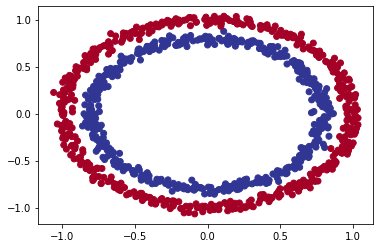

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c= y, cmap = plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


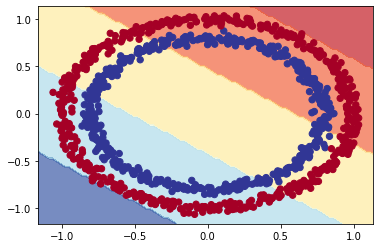

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model = model_5,
                       X = X,
                       y = y);

Let's try build our first neural network with a non-linear activation function.

In [ ]:
# We go to tensorflow playground and play with the model and try to create similar models in here
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile the model 
model_5.compile (loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit (X, y, epochs = 100) 

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3295 - accuracy: 0.4570
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2873 - accuracy: 0.4540
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2331 - accuracy: 0.4570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1219 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0849 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0692 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0632 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0308 - accuracy: 0.4580
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9905 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9247 - accuracy: 0.4570
Epoch 11/

As you might have noticed, there are two ways to specify the hyperparameters:
1. Use of tf. For eg,loss = tf.keras.activations.BinaryCrossentropy()
2. String format. For eg, loss = "binary_crossentropy"

As we saw, the accuray ain't that much. Till now, we increased the number of layers, the number of layers, the activation function. But, we did all of that alone. Now, we do all that in conjunction.

In [ ]:
# Time to replicate the model which worked too well on TensorFloe playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model
model_6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


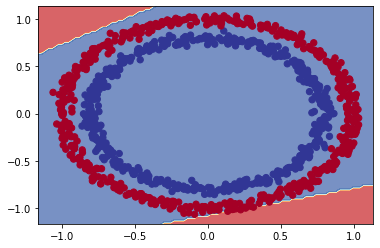

In [ ]:
# How do our model's predictions look like?
plot_decision_boundary(model = model_6, 
                       X = X, 
                       y = y)

Ideally, the yellow line should go between the red and the blue circles

The next thing we are going to tweak is the activation function for the output layer

In [ ]:
# Time to replicate the model which worked too well on TensorFloe playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model
model_7.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.7120 - accuracy: 0.5160
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.5040
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.4900
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.4920
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.4880
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4850
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4870
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4900
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4880
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4850
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9760


[0.09734605252742767, 0.9760000109672546]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


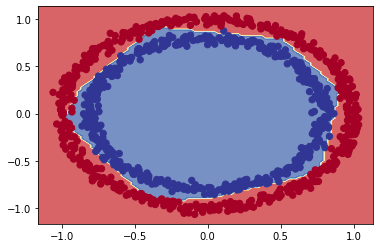

In [ ]:
# How do our model's predictions look like?
plot_decision_boundary(model = model_7, 
                       X = X, 
                       y = y)

We are evaluating our model on the training data set. We need to find new data to evaluate our model correctly.


But we learned that the combination of **linear (stright lines) and non-linear (non- straight lines) functions** is one of the key fundamentals of neural networks.

We've seen the concept of linear and non-linear functions (lines), let's see them in action!!

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

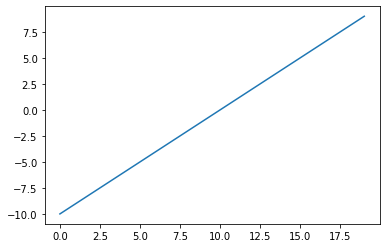

In [ ]:
# Visualize the toy tensor 
plt.plot(A)

In [ ]:
# Let's try by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+ tf.exp(-x))

# Use the sigmoid function on our toy tensor 
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

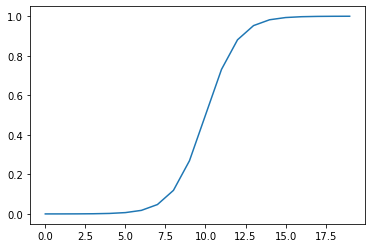

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's now recreate the relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

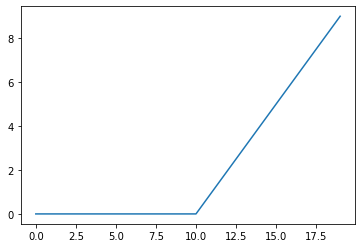

In [ ]:
# Plot the relu function as transformed by the relu function
plt.plot(relu(A));

In [ ]:
# Now, on to the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

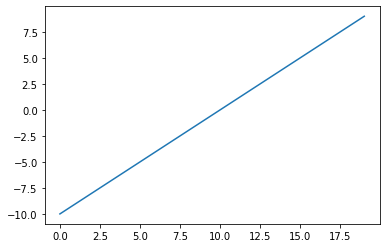

In [ ]:
# Let's see if the linear activation function change anything
plt.plot(tf.keras.activations.linear(A));

Doesn't seem so!!

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

As mentioned before, we trained and evaluated our model on the same dataset. Which in machine learning is an eternal, non forgivable sin!!!

Hence, now we go on to create some test dataset to evaluate our model correctly.

In [ ]:
# Check the samples
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.1), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Split the data 
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

# Fit the model
history = model_8.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.7051 - accuracy: 0.5150
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5075
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5113
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5113
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5013
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4850
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4975
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5013
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4913
Epoch 11/

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.9750


[0.33366885781288147, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


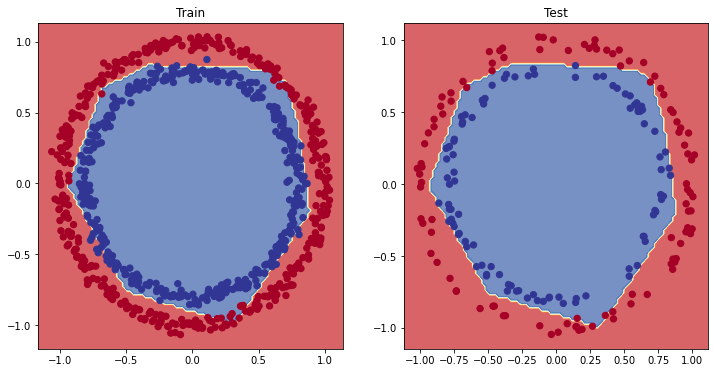

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.7051056027412415,
  0.7023110389709473,
  0.7005331516265869,
  0.6991710066795349,
  0.6982754468917847,
  0.6975528001785278,
  0.6969075202941895,
  0.6963813304901123,
  0.6958936452865601,
  0.6954260468482971,
  0.6951250433921814,
  0.6947318315505981,
  0.6943476796150208,
  0.6940293312072754,
  0.6936420202255249,
  0.6930805444717407,
  0.6928728222846985,
  0.692605197429657,
  0.6924640536308289,
  0.6922116875648499,
  0.6919851899147034,
  0.6917340755462646,
  0.6915485262870789,
  0.69134920835495,
  0.6911296248435974,
  0.6909736394882202,
  0.690748929977417,
  0.6904681921005249,
  0.6902832984924316,
  0.6900730729103088,
  0.6898413300514221,
  0.6896306872367859,
  0.68943190574646,
  0.6892011761665344,
  0.6890662908554077,
  0.6887487173080444,
  0.6885678768157959,
  0.688445508480072,
  0.688152015209198,
  0.687949538230896,
  0.6877264380455017,
  0.6874627470970154,
  0.6872609853744507,
  0.6870150566101074,
  0.686829686164856,
  0.68656110

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.705106,0.51500
1,0.702311,0.50750
2,0.700533,0.51125
3,0.699171,0.51125
4,0.698275,0.50125
...,...,...
195,0.383570,0.93750
196,0.370088,0.94375
197,0.361384,0.94250
198,0.354357,0.95375


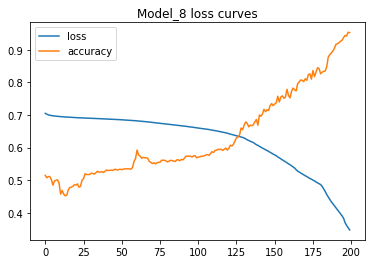

In [ ]:
 # Plot the loss curves
 pd.DataFrame(history.history).plot()
 plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving (the prediction it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - one can think of callback as an extra piece of functionality one can add *while* it trains.
* Another model (we could use the same one as above, but we are practising building models here)
* A modified loss curve plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model ( passing the lr_scheduler)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7277 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7261 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7154 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

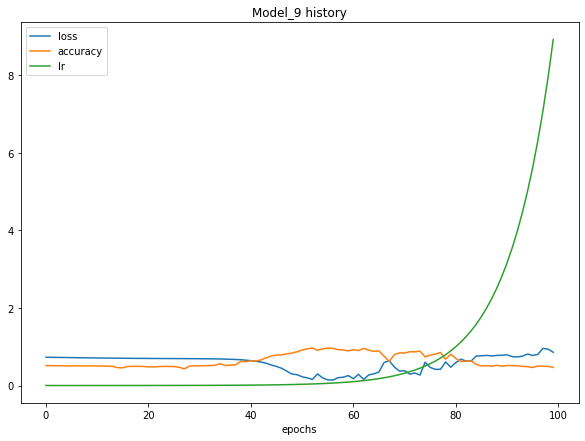

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize = (10, 7), xlabel = "epochs")
plt.title("Model_9 history");

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 *(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

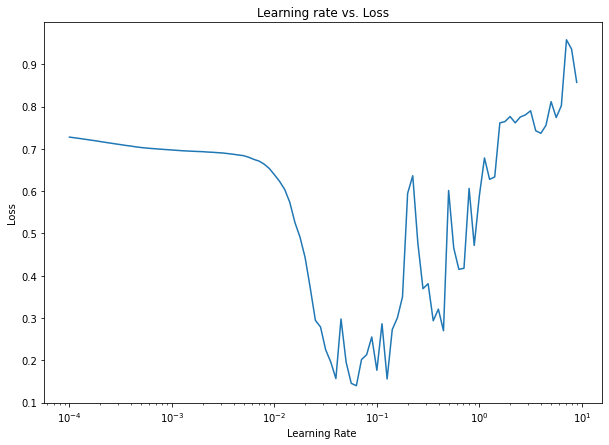

In [ ]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate ")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

A good rule of thumb is that the ideal learning rate is about 10 times the lowest point in the "Learning Rate vs. Loss" graph.

Second, we choose the part of the above graph where the loss is decreasing the fastest.

In [ ]:
# Examples of other typical learning rates are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set the random seed
tf.random.set_seed(42)

# Make the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(lr = 0.2),
                 metrics = ["accuracy"])

# Fit the model for epochs less than as compared to model_8
history_10 = model_10.fit(X_train, y_train, epochs = 150)

Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5113
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5050
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5063
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5063
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4975
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5050
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5125
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5113
Epoch 11/

Even though the epochs for model_10 were less than the epochs for model_8, the fact that we chose a good learning rate compensated for it.

In [ ]:
# Evaluate model_10 on the test set
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9950


[0.11728492379188538, 0.9950000047683716]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.9750


[0.33366885781288147, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


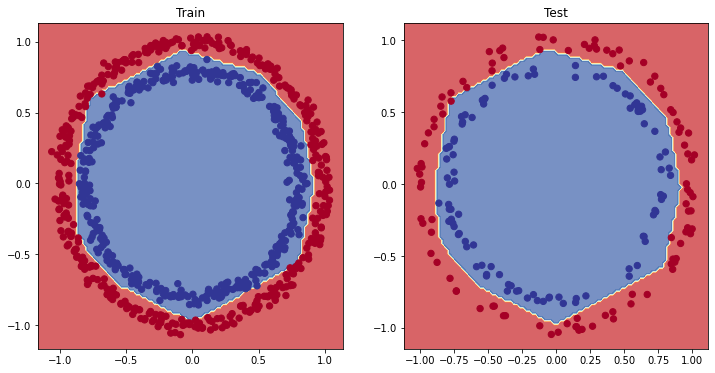

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X= X_test, y = y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9950
Model loss on the test set: 0.11728492379188538
Model accuracy on the test set: 99.50%


How about a confusion matrix?

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[0.9320734 ],
       [0.9989061 ],
       [0.9639367 ],
       [0.9550519 ],
       [0.28058127],
       [0.1357068 ],
       [0.9828917 ],
       [0.1357068 ],
       [0.9930283 ],
       [0.1357068 ]], dtype=float32)

Looks like our `y_pred` is in the form of **prediction probabilities**, the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[100,   1],
       [  0,  99]])

How to prettify our confusion matrix?

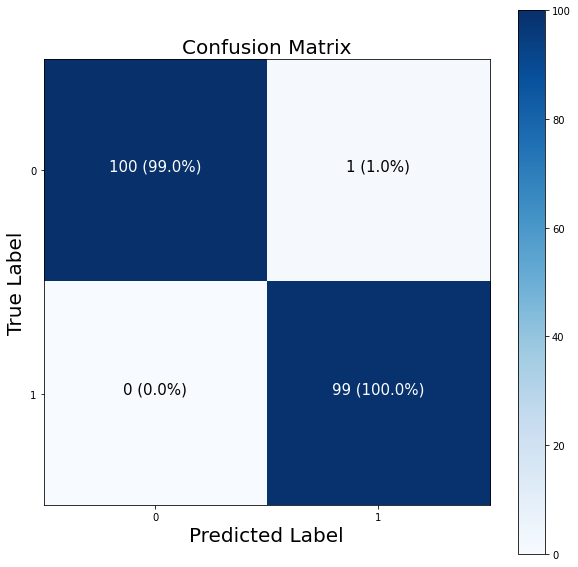

In [ ]:
# Note: The confusion matrix we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/metrics/_plot/confusion_matrix.py#L11

import itertools 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colours
threshold = (cm.max()+cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j]> threshold else "black",
           size = 15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample: \n {train_data[0]}\n")
print(f"Training Label: \n {train_labels[0]}\n")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

If we look up to documentation, there are 10 different objects. The number 9 is for an ankle boot.

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

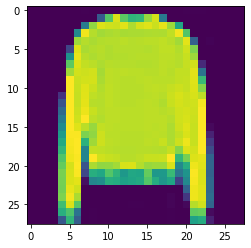

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[546]);

In [ ]:
# Check out the sample's label
train_labels[546]

2

In [ ]:
# Create a small list so we can index onto our training lables so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Since it is more than 2, we are dealing with multi-class classification

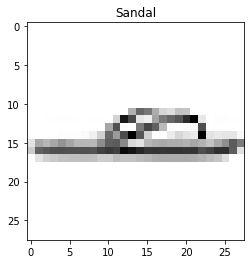

In [ ]:
# Plot an example image and its label
index_of_choice = 784
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary) # This will give a greyscale version of image
plt.title(class_names[train_labels[index_of_choice]]);

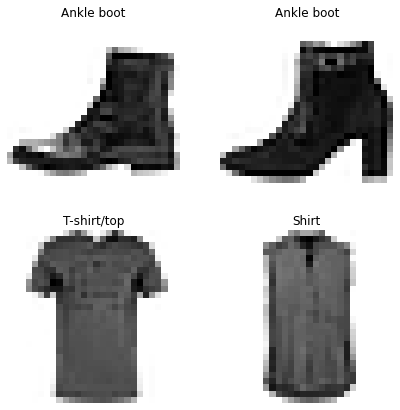

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi class model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 X 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * CategoricalCrossentropy expects our labels to be one hot encoded. 
  * If we have 
integer values, then we need to use SparseCategoricalCrossentropy
* Output layer activation = Softmax(not sigmoid)


In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flattens the input. Here, it turns the input size from (28, 28) to (None, 784)
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs = 10, 
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3237 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural data prefer the data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 and 1.

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values od the scaled training data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flattens the input. Here, it turns the input size from (28, 28) to (None, 784)
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, 
                                tf.one_hot(train_labels, depth = 10), 
                                epochs = 10, 
                                validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1456 - accuracy: 0.6020 - val_loss: 0.8074 - val_accuracy: 0.7022
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7307 - accuracy: 0.7453 - val_loss: 0.7129 - val_accuracy: 0.7539
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6476 - accuracy: 0.7801 - val_loss: 0.6520 - val_accuracy: 0.7792
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6038 - accuracy: 0.7951 - val_loss: 0.6273 - val_accuracy: 0.7882
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5792 - accuracy: 0.8021 - val_loss: 0.6006 - val_accuracy: 0.7917
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5601 - accuracy: 0.8086 - val_loss: 0.5976 - val_accuracy: 0.7980
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5466 - accuracy: 0.8124 - val_loss: 0.5974 - val_accuracy:

> Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

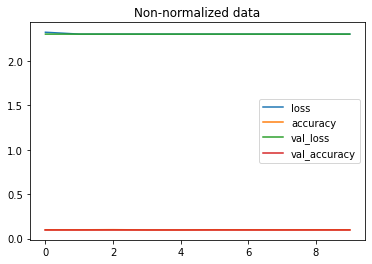

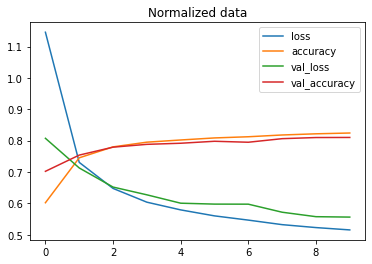

In [ ]:
import pandas as pd 
# Plot the non-noralized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data");
# Plot the normalized data loss curve
pd.DataFrame(norm_history.history).plot(title = "Normalized data");

> **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when we are comparing models, we need to make sure we are comparing on the same criteria (eg. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate 

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])


# Compile the model 
model_13.compile (loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data= (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.7397 - accuracy: 0.3249 - val_loss: 1.3409 - val_accuracy: 0.4617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1219 - accuracy: 0.5440 - val_loss: 0.9107 - val_accuracy: 0.6661 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7530 - accuracy: 0.7393 - val_loss: 0.7172 - val_accuracy: 0.7388 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6401 - accuracy: 0.7657 - val_loss: 0.6437 - val_accuracy: 0.7620 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5989 - accuracy: 0.7793 - val_loss: 0.6183 - val_accuracy: 0.7756 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5725 - accuracy: 0.7957 - val_loss: 0.6313 - val_accuracy: 0.7786 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

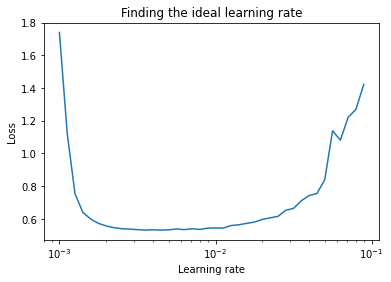

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit the model with ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])


# Compile the model 
model_14.compile (loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs = 20,
                               validation_data= (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 14s 6ms/step - loss: 1.2128 - accuracy: 0.5505 - val_loss: 0.8371 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7612 - accuracy: 0.7369 - val_loss: 0.7508 - val_accuracy: 0.7439 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6888 - accuracy: 0.7616 - val_loss: 0.6983 - val_accuracy: 0.7585 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6463 - accuracy: 0.7746 - val_loss: 0.6583 - val_accuracy: 0.7750 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6180 - accuracy: 0.7830 - val_loss: 0.6320 - val_accuracy: 0.7842 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5987 - accuracy: 0.7904 - val_loss: 0.6761 - val_accuracy: 0.7664 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6

## Evaluating our multi-class classification model

To evaluate our multi class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (thorugh visualizations).
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application.

Let's go thorugh the top 2 options...

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis] # Normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to the classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colours
  threshold = (cm.max()+cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j]> threshold else "black",
            size = text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # prob is an abbreviation for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.5982545e-06, 8.5430362e-18, 8.3257148e-13, 4.2129790e-07,
        3.4126938e-08, 3.8427538e-01, 4.4412417e-07, 4.5330271e-02,
        2.3593187e-02, 5.4679763e-01],
       [2.4626302e-04, 2.8272567e-11, 9.1415262e-01, 1.0265259e-08,
        1.3432227e-02, 3.5866217e-33, 7.2168842e-02, 0.0000000e+00,
        1.3168861e-07, 0.0000000e+00],
       [2.8071949e-07, 9.7977376e-01, 1.2308122e-03, 2.3516831e-03,
        1.6638085e-02, 6.7569608e-16, 4.0389523e-06, 3.0284085e-16,
        9.7574878e-13, 1.1172529e-06],
       [4.2800248e-09, 9.9924588e-01, 1.3487399e-05, 5.6952989e-04,
        1.6944899e-04, 1.4888647e-17, 1.3357008e-08, 1.0475872e-17,
        2.1788424e-16, 1.6129293e-06],
       [1.6656925e-01, 5.9263908e-05, 2.3616889e-01, 1.0823626e-02,
        3.7160456e-02, 4.7369355e-11, 5.4574925e-01, 7.5516097e-17,
        3.4692977e-03, 2.8886631e-15]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data we trained our model on. If we trained on normalized data, predictions ahould also be made on normalized data

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.5982545e-06, 8.5430362e-18, 8.3257148e-13, 4.2129790e-07,
        3.4126938e-08, 3.8427538e-01, 4.4412417e-07, 4.5330271e-02,
        2.3593187e-02, 5.4679763e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all prediction probavilities into integers
y_preds = y_probs.argmax(axis = 1)

In [ ]:
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[767,   0,  15,  75,   3,   0, 123,   0,  16,   1],
       [  2, 923,  14,  47,  12,   0,   1,   0,   1,   0],
       [ 14,   2, 622,  10, 169,   0, 177,   0,   6,   0],
       [ 75,  10,  32, 776,  31,   1,  69,   0,   6,   0],
       [  0,   1, 101,  15, 716,   0, 152,   0,  15,   0],
       [  0,   0,   0,   3,   1, 918,   0,  32,  24,  22],
       [172,   1,  79,  42, 109,   1, 566,   0,  30,   0],
       [  0,   0,   0,   0,   1,  53,   0, 892,  12,  42],
       [  1,   0,   0,  10,   6,   3,  42,   2, 936,   0],
       [  0,   0,   0,   1,   3,  29,   1,  37,   9, 920]])

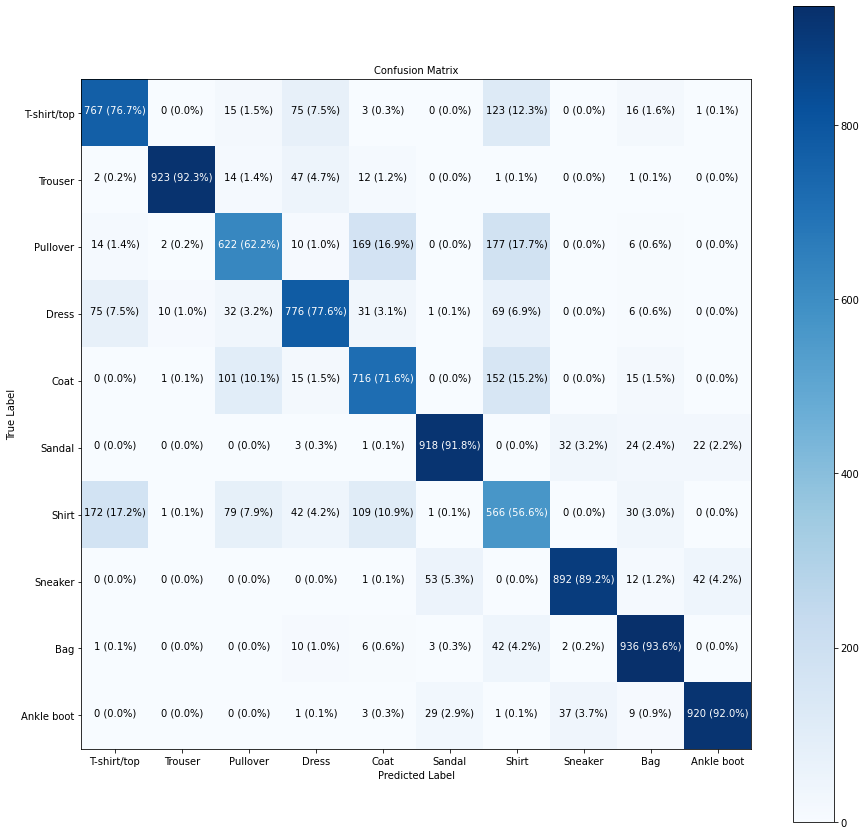

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.
9
Hence, we create a function for:
* Plot a random image
* Make a prediction on the said image
* Label the plot with the truth and predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  # Pick a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the images
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the colour of the tite depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/ true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100* tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

1/1 [==============================] - 0s 56ms/step


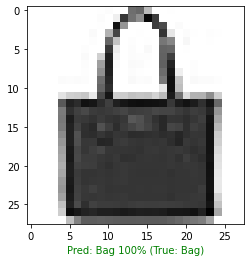

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model = model_14,
                  images = test_data_norm, # always predict on the same kind data on whoch model is trained on
                  true_labels = test_labels,
                  classes = class_names)

## What patterns is our model exactly learning?

In [ ]:
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterna of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.6390671 , -0.07470457,  0.28157142,  1.6635833 ],
        [-1.7608749 ,  1.3489012 ,  1.1099615 ,  0.96209437],
        [-3.8134828 ,  0.5108387 ,  1.9592078 ,  4.2290726 ],
        ...,
        [-0.79715455,  1.2072026 ,  1.2910752 , -0.59455246],
        [ 1.0871688 , -0.29585737,  1.3505304 , -2.8505235 ],
        [-1.435009  , -0.74835473,  0.571408  ,  1.3812754 ]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now, let's check out the bias vector

In [ ]:
# Biases and biases shape
biases, biases.shape

(array([1.3042183, 3.0755434, 2.084947 , 2.5893545], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (atleast in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

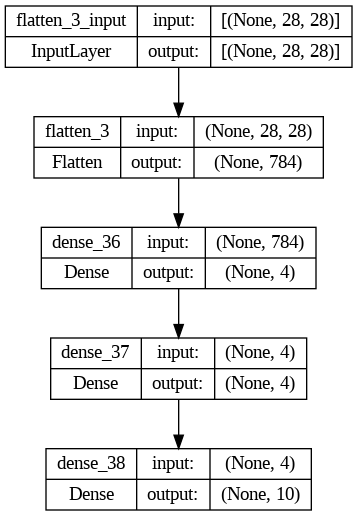

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the input and output of each layer
plot_model(model_14, show_shapes = True)